# MVA Mini Project 1

Student: Pierre-Louis Guhur - pierre-louis.guhur@ens-paris-saclay.fr

# 1. Getting started

In [60]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
#from shutil import copyfile
#copyfile(src="../input/mp1.py", dst = "../working/mp1.py")
from mp1 import *

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2. Simple Classification

Example of the classes to classify

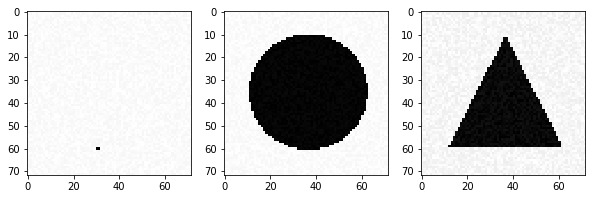

In [61]:
plt.figure(figsize=(10,10))

plt.subplot(131)
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(72,72), cmap='gray')

plt.subplot(132)
im = generate_a_disk(10)
plt.imshow(im.reshape(72,72), cmap='gray')

plt.subplot(133)
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(72,72), cmap='gray')

plt.show()

models = {}
n_classes = 3
n_hidden = 64

In [95]:
X_train, Y_train = generate_dataset_classification(300, 20, False)
X_test, Y_test = generate_test_set_classification(300, 20, False)

Creating data: 100%|██████████| 300/300 [00:03<00:00, 79.36it/s]


## 2.1 Training a model with SGD

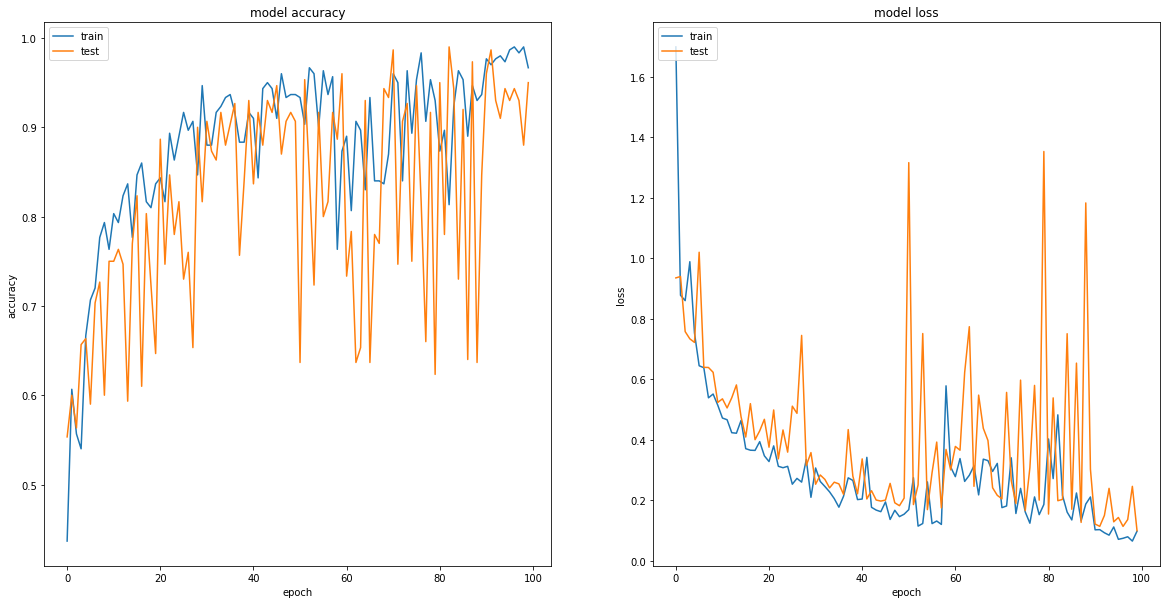

In [96]:
models['sgd'] = Sequential()
models['sgd'].add(Dense(n_hidden, activation='relu', input_shape=(X_train.shape[1],)))
models['sgd'].add(Dense(n_classes, activation='softmax'))
models['sgd'].compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = models['sgd'].fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), verbose=0)
plot_history(history)

## 2.2 Training a model with Adam

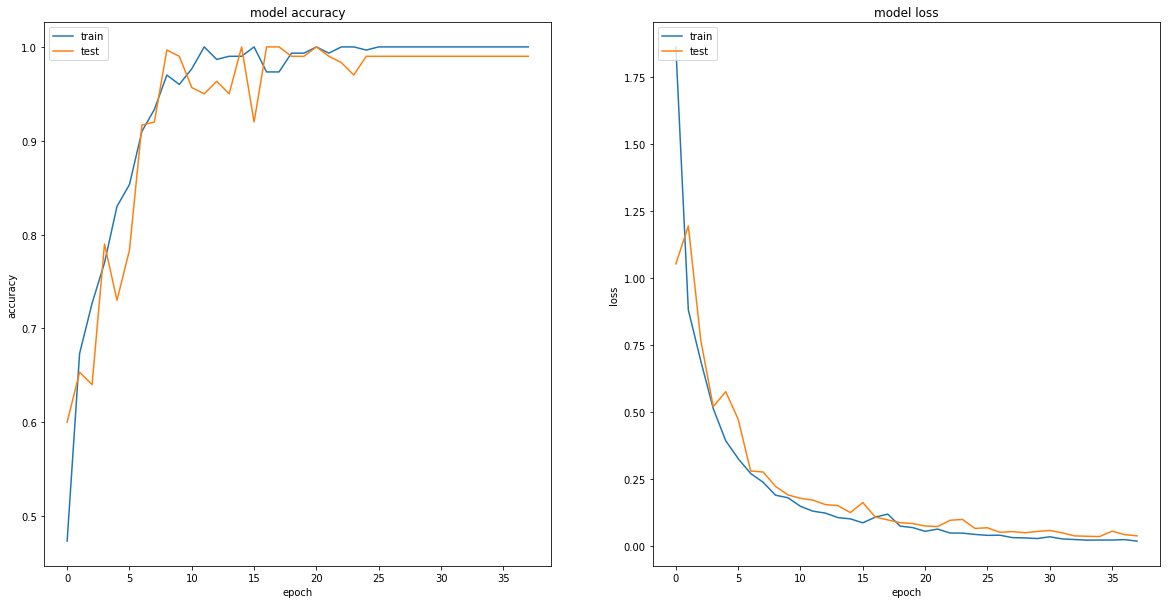

In [97]:
early_stopping_monitor = EarlyStopping(patience = 3)

models['adam'] = Sequential()
models['adam'].add(Dense(n_hidden, activation='relu', input_shape=(X_train.shape[1],)))
models['adam'].add(Dense(n_classes, activation='softmax'))
models['adam'].compile(optimizer='adam', loss='categorical_crossentropy', 
                       metrics=['accuracy'])
history = models['adam'].fit(X_train, Y_train, batch_size=32, epochs=100, 
                             validation_data=(X_test, Y_test), callbacks=[early_stopping_monitor], verbose=0)
plot_history(history)

# 3. Visualization of the Solution

In [30]:
print(models['adam'].summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                331840    
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 195       
Total params: 332,035
Trainable params: 332,035
Non-trainable params: 0
_________________________________________________________________
None


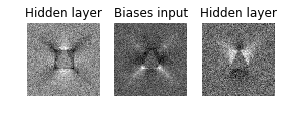

In [57]:
weights = models['adam'].get_weights()
image = weights[0] @ weights[2]
n_layers = len(weights)
titles = ["Hidden layer", "Biases input", "Hidden layer"]

for k in range(3):
    plt.subplot(1, n_layers, k + 1)
    plt.imshow(image[:, k].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title(titles[k])
    plt.axis("off")

plt.show()

# 4. A More Difficult Classification Problem

In [111]:
X_train, Y_train = generate_dataset_classification(600, 20, True)
X_test, Y_test = generate_test_set_classification(300, 20, True)

Creating data: 100%|██████████| 300/300 [00:03<00:00, 82.51it/s]


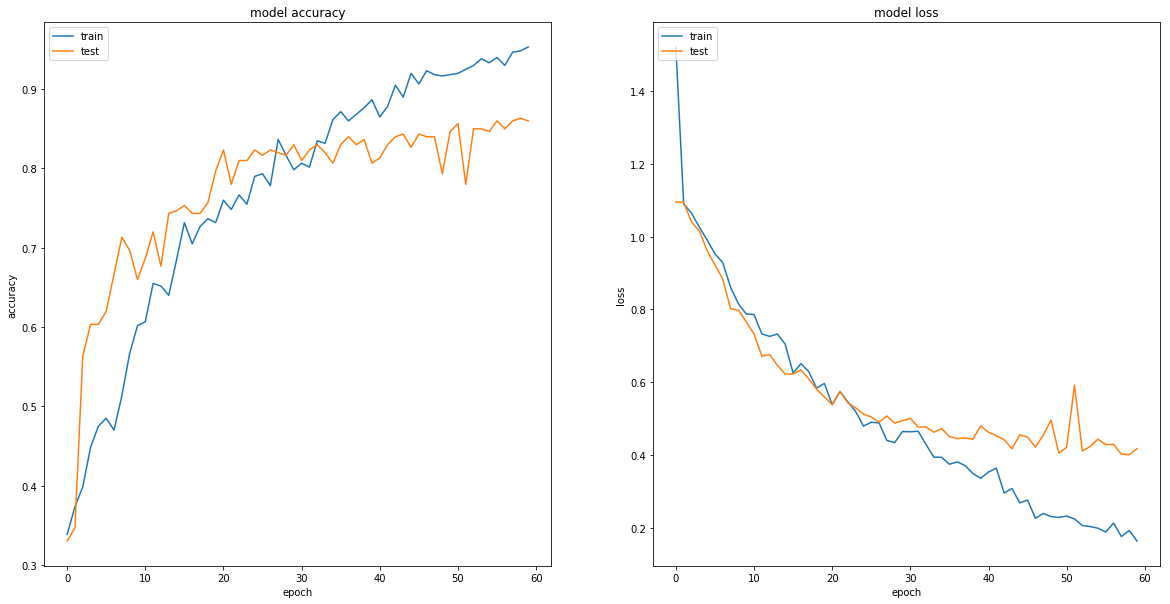

In [115]:
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D,Activation
from keras.layers import Dropout
from keras.layers import Flatten

models['convnet'] = Sequential()
models['convnet'].add(Conv2D(16,(5,5), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1))) #filters
models['convnet'].add(MaxPooling2D(pool_size=(2,2))) #pooling layer
models['convnet'].add(Dropout(0.5))
models['convnet'].add(Flatten())
models['convnet'].add(Dense(64, activation='relu'))
models['convnet'].add(Dropout(0.5))
models['convnet'].add(Dense(n_classes, activation='softmax'))
models['convnet'].compile(optimizer='adam', loss='categorical_crossentropy', 
                       metrics=['accuracy'])


X_train2 = X_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, -1).astype('float32')
X_test2 = X_test.reshape(X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, -1).astype('float32')

history = models['convnet'].fit(X_train2, Y_train, batch_size=32, epochs=60, 
                             validation_data=(X_test2, Y_test), verbose=0)

plot_history(history)

In [120]:
evaluation = models['convnet'].evaluate(X_test2, Y_test)
print(f"Evaluation on the test set: accuracy {evaluation[1]*100:.2f}% - loss {evaluation[0]*100:.2f}%")

300/300 [==============================] - 0s 464us/step
Evaluation on the test set: accuracy 86.00% - loss 41.70%


# 5. A Regression Problem

Creating data: 100%|██████████| 300/300 [00:04<00:00, 90.40it/s]


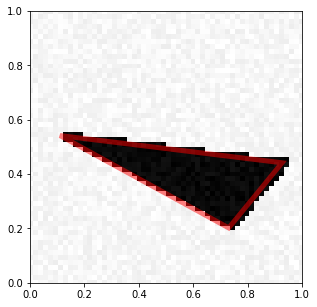

In [124]:
[X_train, Y_train] = generate_dataset_regression(300, 20)
[X_test, Y_test] = generate_test_set_regression()
visualize_prediction(X_train[0], Y_train[0])



In [131]:
def normalize_triangle(Y):
    p =[[Y[0], Y[1], np.sqrt(Y[0]**2 + Y[1]**2)],
    [Y[2], Y[3], np.sqrt(Y[2]**2 + Y[3]**2)],
    [Y[4], Y[5], np.sqrt(Y[4]**2 + Y[5]**2)]]
    p.sort(key=lambda x:x[2])
    y = np.array([p[0][0], p[0][1], p[1][0], p[1][1], p[2][0], p[2][1]])
    return y

Y_train_n = Y_train.copy()
for i in range(X_train.shape[0]):
    Y_train_n[i] = normalize_triangle(Y_train[i])
    
Y_test_n = Y_test.copy()
for i in range(X_test.shape[0]):
    Y_test_n[i] = normalize_triangle(Y_test[i])
    
X_train2d = X_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1).astype('float32')
X_test2d = X_test.reshape(X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1).astype('float32')

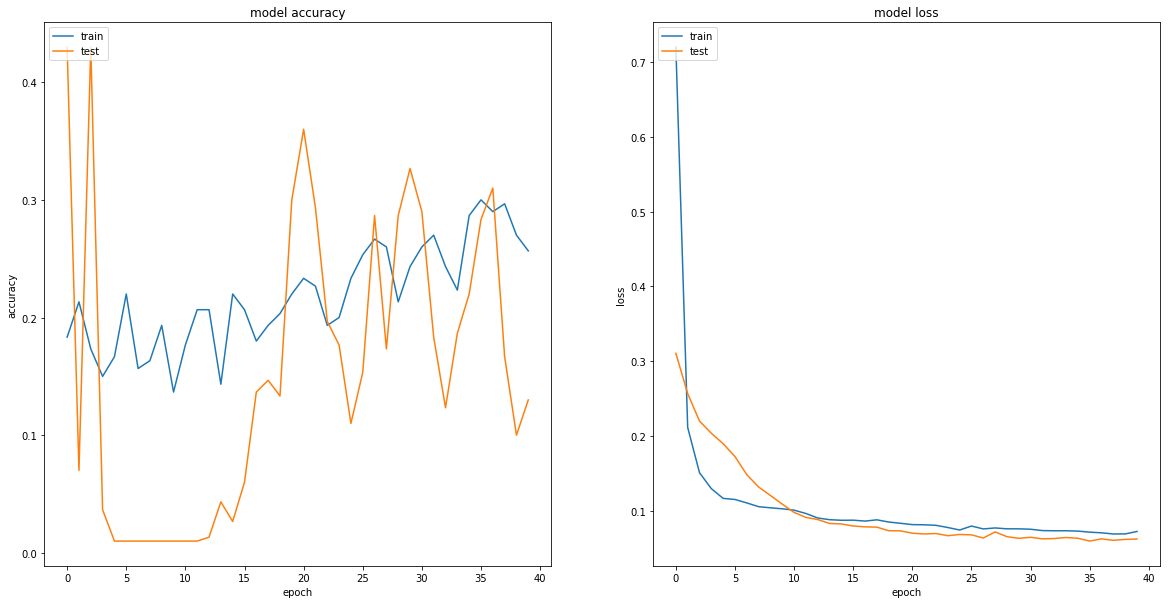

300/300 [==============================] - 0s 1ms/step
Evaluation on the test set: accuracy 13.00% - loss 6.31%


In [132]:
from keras import optimizers

models['regr'] = Sequential()
models['regr'].add(Conv2D(32, activation='relu', input_shape=(72,72,1), kernel_size=(5,5), padding="same"))
models['regr'].add(MaxPooling2D(pool_size=(2,2), padding="same"))
models['regr'].add(Dropout(0.5))
models['regr'].add(Conv2D(32, (5,5), activation="relu", padding="same"))
models['regr'].add(MaxPooling2D(pool_size=(2,2), padding="same"))
models['regr'].add(Dropout(0.5))
models['regr'].add(Flatten())
models['regr'].add(Dense(256, activation='relu'))
models['regr'].add(Dropout(0.5))
models['regr'].add(Dense(256, activation='relu'))
models['regr'].add(Dropout(0.5))
models['regr'].add(Dense(128, activation='relu'))
models['regr'].add(Dropout(0.5))
models['regr'].add(Dense(6))


# model3 = Sequential()
# model3.add(Conv2D(16,(5,5), activation='relu', input_shape=(72,72,1))) #filters
# model3.add(MaxPooling2D(pool_size=(2,2))) #pooling layer
# model3.add(Conv2D(32,(5,5), activation='relu')) #filters
# model3.add(MaxPooling2D(pool_size=(2,2))) #pooling layer
# model3.add(Conv2D(64,(5,5), activation='relu')) #filters
# model3.add(MaxPooling2D(pool_size=(2,2))) #pooling layer
# model3.add(Flatten())
# model3.add(Dense(64))
# model3.add(Activation('relu'))
# model3.add(Dropout(0.5))
# model3.add(Dense(6))


models['regr'].compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = models['regr'].fit(X_train2d, Y_train, batch_size=32, epochs=40, shuffle=True, 
           validation_data=(X_test2d, Y_test_n), verbose=0)
plot_history(history)
evaluation = models['regr'].evaluate(X_test2d, Y_test_n)
print(f"Evaluation on the test set: accuracy {evaluation[1]*100:.2f}% - loss {evaluation[0]*100:.2f}%")

In [140]:
number_filter_regression = 32
filter_size = (5,5)
pixel_window = (2,2)
model_5 = Sequential()
model_5.add(Conv2D(32, activation='relu', input_shape=(72,72,1), kernel_size=(5,5), padding="same"))
model_5.add(MaxPooling2D(pool_size=(2,2), padding="same"))
model_5.add(Conv2D(32, (5,5), activation="relu", padding="same"))
model_5.add(MaxPooling2D(pool_size=(2,2), padding="same"))
#model_5.add(Dropout(0.25))
model_5.add(Flatten())
model_5.add(Dense(256, activation='relu'))
#model_5.add(Dropout(0.25))
model_5.add(Dense(256, activation='relu'))
#model_5.add(Dropout(0.25))
model_5.add(Dense(128, activation='relu'))
#model_5.add(Dropout(0.25))
model_5.add(Dense(6))

model_5.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model_5.fit(X_train2d, Y_train, batch_size=32, epochs=40, shuffle=True, 
           validation_data=(X_test2d, Y_test_n), verbose=0)
plot_history(history)
evaluation = model_5.evaluate(X_test2d, Y_test_n)
print(f"Evaluation on the test set: accuracy {evaluation[1]*100:.2f}% - loss {evaluation[0]*100:.2f}%")

TypeError: unsupported operand type(s) for -: 'Tensor' and 'Tensor'

In [141]:
model_5 = Sequential()
model_5.add(Conv2D(32, activation='relu', input_shape=(72,72,1), kernel_size=(5,5), padding="same"))


TypeError: unsupported operand type(s) for -: 'Tensor' and 'Tensor'